# Interview Question: Parsing CSV Files

## Problem


1. Football: The `football.csv` file contains the results from the English Premier League. The columns labeled ‘Goals’ and ‘Goals Allowed’ contain the total number of goals scored for and against each team in that season (so Arsenal scored 79 goals against opponents, and had 36 goals scored against them). Write a program to read the file, then print the name of the team with the smallest difference in ‘for’ and ‘against’ goals.
2. Weather: In `weather.csv` you’ll find daily weather data. Write a program to read the file, then output the day number (column one) with the smallest temperature spread (the maximum temperature is the second column, the minimum the third column).
3. See if you can write the same program to solve both questions.

### 1. Testing with football data

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib as plt

pd.set_option('display.mpl_style','default') #make the graphs a bit prettier
#plt.rcParams['figure.figsize'] = (30, 20)

In [3]:
df = pd.read_csv('football.csv', sep=',')
df

,Team,Games,Wins,Losses,Draws,Goals,Goals Allowed,Points
0,Arsenal,38,26,9,3,79,36,87
1,Liverpool,38,24,8,6,67,30,80
2,Manchester United,38,24,5,9,87,45,77
3,Newcastle,38,21,8,9,74,52,71
4,Leeds,38,18,12,8,53,37,66
5,Chelsea,38,17,13,8,66,38,64
6,West_Ham,38,15,8,15,48,57,53
7,Aston_Villa,38,12,14,12,46,47,50
8,Tottenham,38,14,8,16,49,53,50
9,Blackburn,38,12,10,16,55,51,46


In [5]:
#Create a new column called 'Net Goals'
df['Net Goals'] = df['Goals'] - df['Goals Allowed']

In [8]:
df

,Team,Games,Wins,Losses,Draws,Goals,Goals Allowed,Points,Net Goals
0,Arsenal,38,26,9,3,79,36,87,43
1,Liverpool,38,24,8,6,67,30,80,37
2,Manchester United,38,24,5,9,87,45,77,42
3,Newcastle,38,21,8,9,74,52,71,22
4,Leeds,38,18,12,8,53,37,66,16
5,Chelsea,38,17,13,8,66,38,64,28
6,West_Ham,38,15,8,15,48,57,53,-9
7,Aston_Villa,38,12,14,12,46,47,50,-1
8,Tottenham,38,14,8,16,49,53,50,-4
9,Blackburn,38,12,10,16,55,51,46,4


In [6]:
#find minimum value of 'Net Goals'
df.min()['Net Goals']

'-34'

In [7]:
#use conditional indexing to find 
#the row with the minimum value 
#and then output the 'Team' column value

df[df['Net Goals'] == int(df.min()['Net Goals'])].iloc[0]['Team']

'Leicester'

### 2. Moving onto weather data

In [28]:
df = pd.read_csv('weather.csv', sep=',')
df.dtypes

Day             int64
MxT             int64
MnT             int64
AvT             int64
AvDP          float64
1HrP TPcpn      int64
PDir            int64
AvSp          float64
Dir             int64
MxS             int64
SkyC          float64
MxR             int64
Mn              int64
R AvSLP       float64
dtype: object

In [51]:
df['net'] = df['MxT']-df['MnT']
df[df['net'] == int(df.min()['net'])].iloc[0][df.columns[0]]

14.0

### 3. Now moving onto making a program to solve similar types of problems

In [9]:
def min_net(filename, mxi, mni):
    '''input file name, mni as the column to be subtracted from mxi column'''
    df = pd.read_csv(filename, sep=',')
    df['net'] = df[mxi]-df[mni] 
    first_col = df.columns[0] #get header of first column
    
    #graph net values
    df.plot(x=first_col,y='net',kind='bar',title='Net')
    
    result = df[df['net'] == int(df.min()['net'])]
    result_count = result.shape[0]
    for i in range(result_count):
        print(result.iloc[i][df.columns[0]])
    return None   
    

Leicester


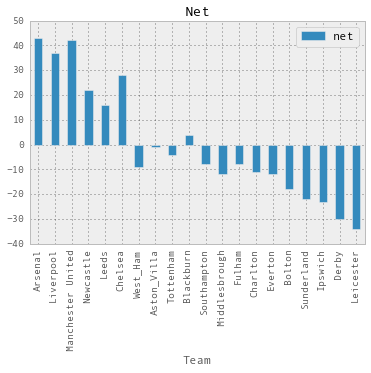

In [10]:
min_net('football.csv','Goals','Goals Allowed')

14.0


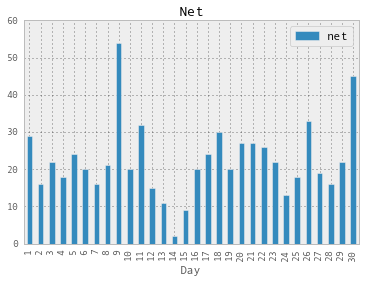

In [11]:
min_net('weather.csv','MxT','MnT')

_Note_: my program also outputs multiple values if there is more than 1 minimum value. 

I manually add another row in `football test.csv` with the same value as Leicester for testing. As shown below.

Leicester
Test


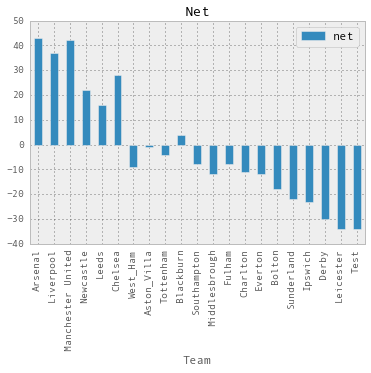

In [13]:
#testing with more than 1 minimum records
min_net('football test.csv','Goals','Goals Allowed')